## Set Up Environment

In [1]:
# import libraries
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [2]:
# read data
df_trainRaw = pd.read_csv("train.csv")
df_testRaw = pd.read_csv("test.csv")

In [3]:
# config 
responders = list(df_trainRaw.columns[-2:])
predictors = list(df_trainRaw.columns[1:-2])

## Exploratory Analysis of Responder

In [4]:
# quick look into dataframe
display(df_trainRaw.head())
display(df_trainRaw.tail())
display(df_testRaw.head())
display(df_testRaw.tail())

,time,A,B,C,D,E,F,G,H,I,J,K,L,M,N,Y1,Y2
0,0,0.207366,-0.159951,-0.634176,-0.580962,-0.266505,0.060173,-0.475257,-1.486516,-0.332594,-0.671466,-0.226149,-0.187624,-0.780237,-0.785965,-0.935902,-0.310081
1,1,0.188828,-0.265508,0.042143,-0.550442,-0.132319,-0.185219,0.028295,0.093210,-0.518139,-0.251917,-0.347845,-0.359069,-0.161254,0.020401,-0.089707,-0.305374
2,2,-0.144261,-0.577142,-0.214634,-0.747391,-0.184255,-0.464831,-0.085181,0.700449,-0.603438,0.197773,-0.566696,-0.580799,0.202726,0.135261,-0.077855,-0.631485
3,3,0.208982,-0.310449,0.513708,-0.562868,0.742308,-0.305487,0.762246,1.363020,-0.384575,0.525556,-0.348514,-0.428099,0.548993,0.471031,0.941271,-0.535212
4,4,0.093320,-0.358156,0.173188,-0.687296,-0.161461,-0.116062,-0.245748,0.863372,-0.655588,-0.263358,-0.557428,-0.481214,0.083602,0.003087,-0.039582,-0.490561


,time,A,B,C,D,E,F,G,H,I,J,K,L,M,N,Y1,Y2
79995,80000,-0.339802,-0.372094,-0.120952,-0.363438,0.266299,-0.222866,-0.000358,0.470755,-0.412086,-0.332426,-0.374358,-0.251086,-0.058820,0.312828,-0.564065,-0.154864
79996,80001,-0.421921,-0.222554,-0.689585,-0.512266,-0.206562,-0.494450,-0.197705,-0.566908,-0.570731,-1.093729,-0.382964,-0.249580,-0.446410,-0.527049,0.031323,-0.474736
79997,80002,-0.467038,-0.282018,0.010707,-0.589594,0.067635,-0.410820,0.032695,-0.506164,-0.513340,-0.871582,-0.345584,-0.402364,-0.372984,-0.419894,-0.213572,-0.503083
79998,80003,-0.369710,-0.322384,-0.540326,-0.563206,-0.568736,-0.550024,-0.339077,-0.903734,-0.212600,-0.571418,-0.223712,-0.307187,-1.057527,-2.012514,-0.600713,-0.233209
79999,80004,-0.304899,-0.047375,-0.932102,-0.229424,-0.474211,-0.336000,-0.573839,-0.260051,-0.231336,-0.338490,-0.350715,-0.250557,-0.553841,-0.393816,-0.518910,-0.110204


,id,time,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,1,80005,-0.371888,-0.273485,0.538326,-0.377691,1.283159,-0.286957,0.439415,0.020831,-0.295480,0.117643,-0.369900,-0.378902,0.470166,0.411796
1,2,80006,-0.459598,-0.514915,-0.235153,-0.262379,0.044343,-0.429888,-0.059034,-0.725713,-0.407681,-0.255702,-0.461901,-0.249516,-0.216745,-0.328599
2,3,80007,-0.381609,-0.265023,-0.629131,-0.186288,-0.146302,-0.357875,0.114223,-0.359341,-0.190712,-0.404083,-0.272153,-0.193158,-0.679351,-0.476331
3,4,80008,-0.371423,-0.106279,-1.142702,-0.200429,-0.176918,-0.354048,-0.230199,-0.305226,0.185342,-0.333010,0.518678,-0.028775,-0.610620,-0.846772
4,5,80009,-0.309393,-0.015144,-1.099371,-0.405841,-0.239068,-0.403306,-0.983134,-1.067315,-0.105132,-0.809948,0.185197,-0.150254,-1.080190,-0.685936


,id,time,A,B,C,D,E,F,G,H,I,J,K,L,M,N
15991,15992,95996,-0.453361,-0.196443,-0.050846,-0.447012,-0.077724,-0.592894,-0.161817,-0.511905,-0.596177,-0.442584,-0.216181,0.122004,-0.697862,0.104958
15992,15993,95997,-0.481709,-0.258110,-0.454017,-0.603110,0.040541,-0.508827,-0.062558,-0.437095,-0.662719,-0.329388,-0.429567,-0.345853,0.092401,-0.273531
15993,15994,95998,-0.457018,-0.300467,0.403098,-0.555525,0.255084,-0.561159,0.126289,0.315079,-0.548791,0.373037,-0.210124,0.131684,0.659701,0.128788
15994,15995,95999,-0.366164,-0.059930,0.541362,-0.505980,0.351848,-0.450031,-0.220432,0.985248,-0.513131,0.912360,-0.439541,0.741077,1.317468,0.268901
15995,15996,96000,-0.538641,-0.382445,0.113962,-0.498791,0.697350,-0.629678,0.146723,0.169349,-0.592991,0.346411,-0.326448,0.349403,1.111082,0.278141


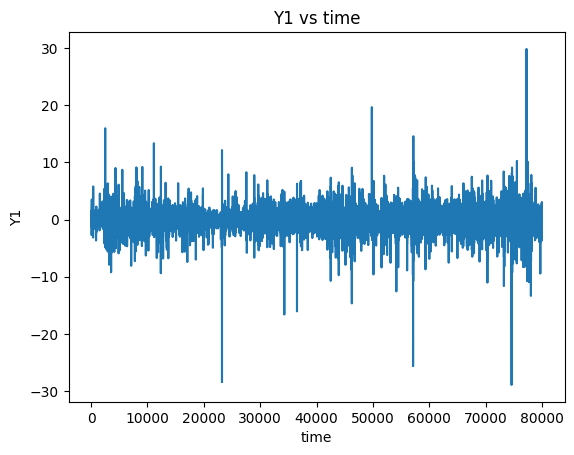

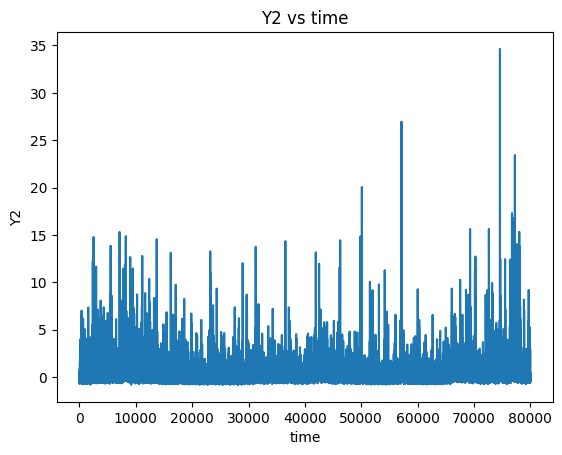

In [5]:
# plot time series of responders
for responder in responders:
    df_trainRaw[responder].plot()
    plt.title(f"{responder} vs time")
    plt.xlabel("time")
    plt.ylabel(responder)
    plt.show()

In [6]:
# responder ranges
for responder in responders:
    display(df_trainRaw[responder].describe())

count    80000.000000
mean        -0.002807
std          0.970655
min        -28.918180
25%         -0.387523
50%         -0.001591
75%          0.392470
max         29.859458
Name: Y1, dtype: float64

count    80000.000000
mean        -0.061172
std          0.923702
min         -0.850799
25%         -0.497802
50%         -0.318091
75%          0.026905
max         34.636039
Name: Y2, dtype: float64

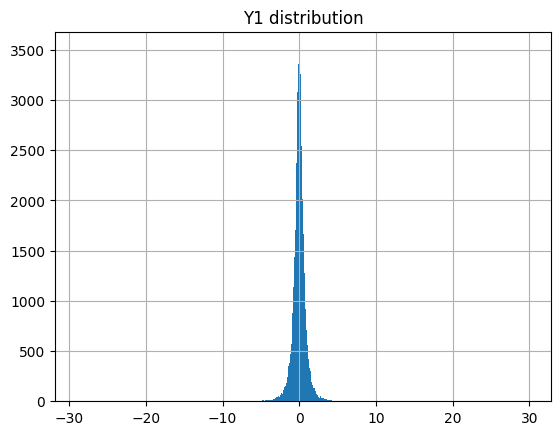

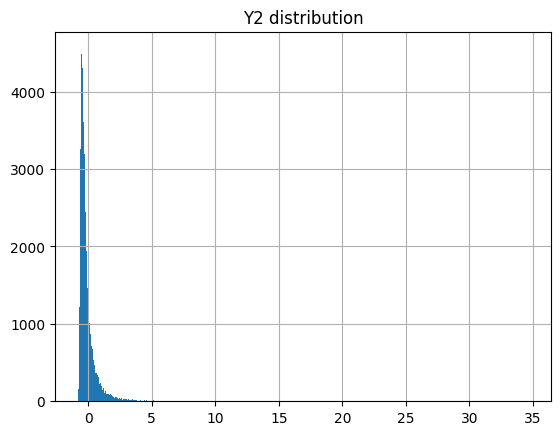

In [7]:
# visualise distributions
for responder in responders:
    plt.title(responder+" distribution")
    plt.hist(df_trainRaw[responder], bins=1000)
    plt.grid(True)
    plt.show()

C:\Users\andyd\AppData\Local\Temp\ipykernel_46720\241643302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Y["t-1_Y1"] = df_Y["Y1"].shift(1)
C:\Users\andyd\AppData\Local\Temp\ipykernel_46720\241643302.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Y["t-1_Y2"] = df_Y["Y2"].shift(1)
C:\Users\andyd\AppData\Local\Temp\ipykernel_46720\241643302.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


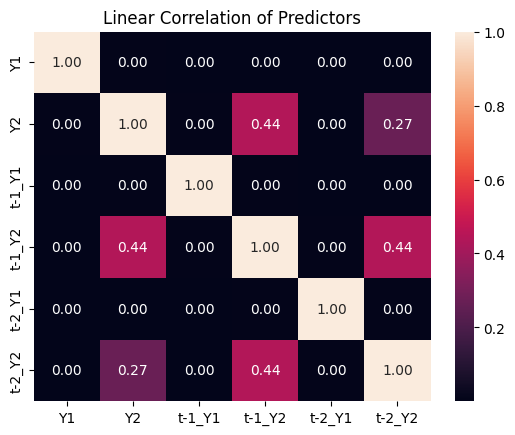

In [26]:
# autocorrelation
df_Y = df_trainRaw[responders]
df_Y["t-1_Y1"] = df_Y["Y1"].shift(1)
df_Y["t-1_Y2"] = df_Y["Y2"].shift(1)
df_Y["t-2_Y1"] = df_Y["Y1"].shift(2)
df_Y["t-2_Y2"] = df_Y["Y2"].shift(2)
df_Y_corr = df_Y.corr() ** 2
sns.heatmap(df_Y_corr, annot=True, fmt=".2f")
plt.title("Linear Correlation of Predictors")
plt.show()


<Axes: xlabel='t-1_Y2', ylabel='Y2'>

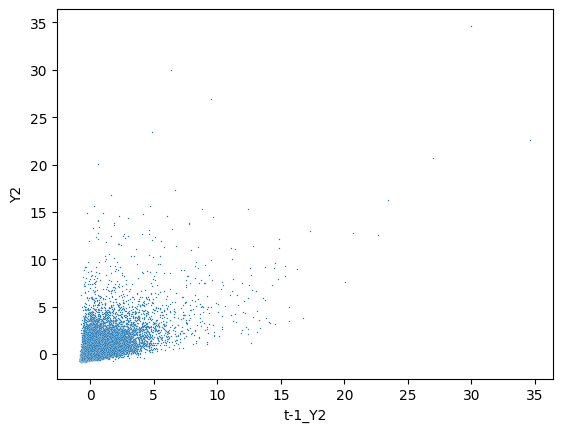

In [27]:
# plot Y2 autocorrelation
sns.scatterplot(df_Y, x="t-1_Y2", y="Y2",s=1)

## Y1 Distribution Visualisation

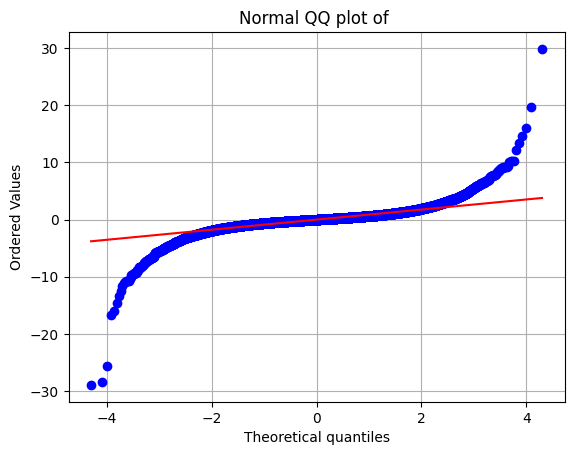

In [9]:
def QQnorm(series, col_name=""):
    norm = np.asarray(series)  
    fig = plt.figure()
    res = stats.probplot(norm, dist="norm", plot=plt)
    plt.title(f"Normal QQ plot of {col_name}")
    plt.grid(True)
    plt.show()    

# distribution check for Y1
QQnorm(df_trainRaw.Y1)

-0.8180800396687815
-0.8180783485533705
0.41331488771973446


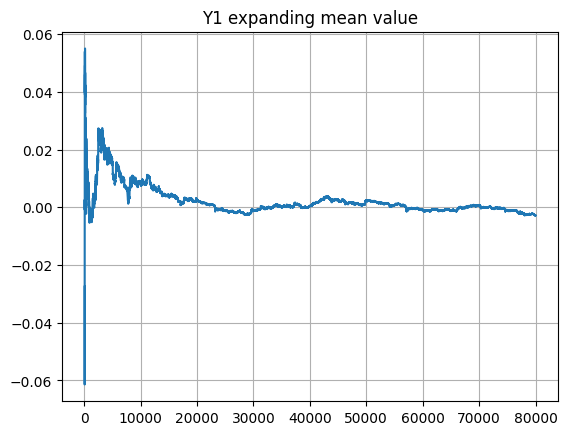

In [10]:
# mean testing for Y1
df_trainRaw.Y1.expanding(min_periods=100).mean().plot()
plt.grid(True)
plt.title("Y1 expanding mean value")
manual_t_stat = df_trainRaw.Y1.sum()/(df_trainRaw.Y1**2).sum()**0.5
t_stat, p_two = stats.ttest_1samp(df_trainRaw.Y1, popmean=0, alternative="two-sided")
print(manual_t_stat)
print(t_stat)
print(p_two)

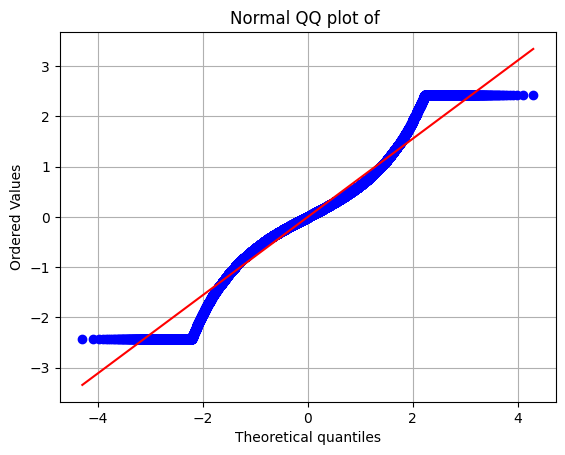

In [11]:
# Y1 kurtosis management (ACAUSAL)
df_Y1 = df_trainRaw[["Y1"]].copy()
df_Y1["std"] = df_Y1["Y1"].std()
df_Y1["Y1_clip"] = df_Y1["Y1"]

clip_std = 2.5
# clip above 
df_Y1["Y1_clip"] += (df_Y1["Y1_clip"] > clip_std * df_Y1["std"]) * (clip_std * df_Y1["std"] - df_Y1["Y1_clip"])
df_Y1["Y1_clip"] += (df_Y1["Y1_clip"] < -clip_std * df_Y1["std"]) * (-clip_std * df_Y1["std"] - df_Y1["Y1_clip"])

# QQ plot of clip
QQnorm(df_Y1.Y1_clip)

In [12]:
# to potentially do for y1
# model kurtosis with mixtures
# check for potential auto correlation, indicating past variables can be predictive

## Early Predictor Analysis with Y1

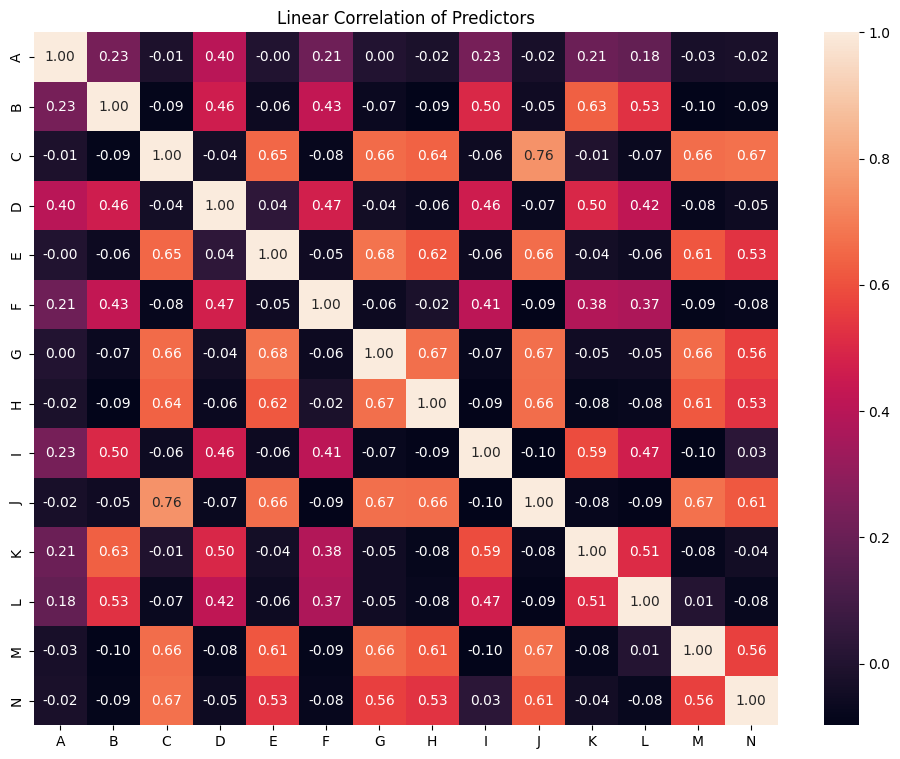

In [13]:
# first, begin with seeing predictor autocorrelation
df_predictors = df_trainRaw[predictors]
df_collinearity = df_predictors.corr()
plt.figure(figsize=(12,9))
sns.heatmap(df_collinearity, annot=True, fmt=".2f")
plt.title("Linear Correlation of Predictors")
plt.show()


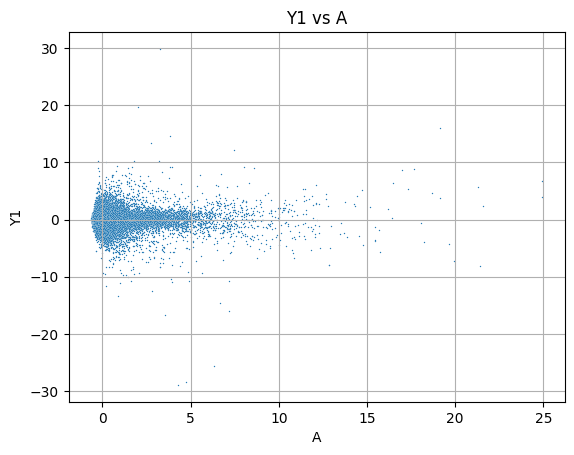

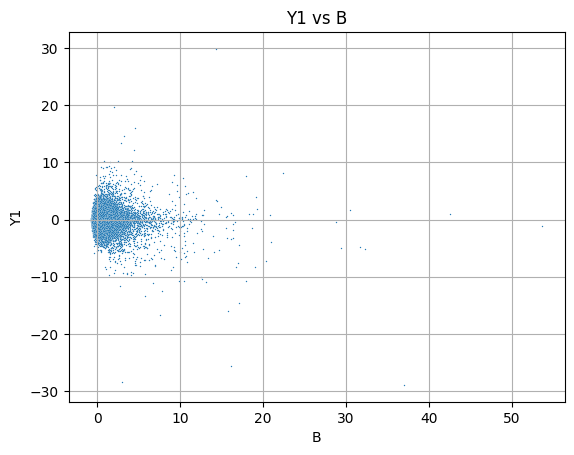

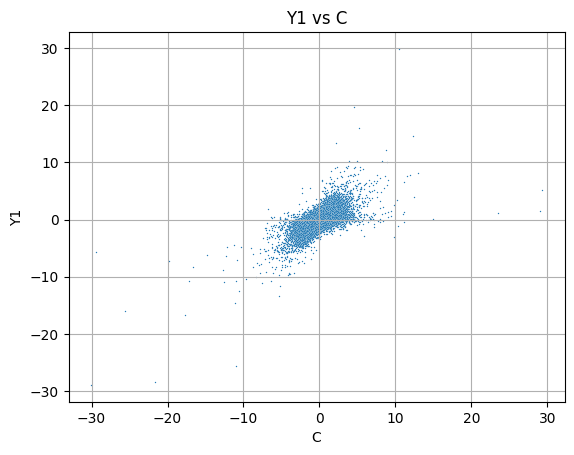

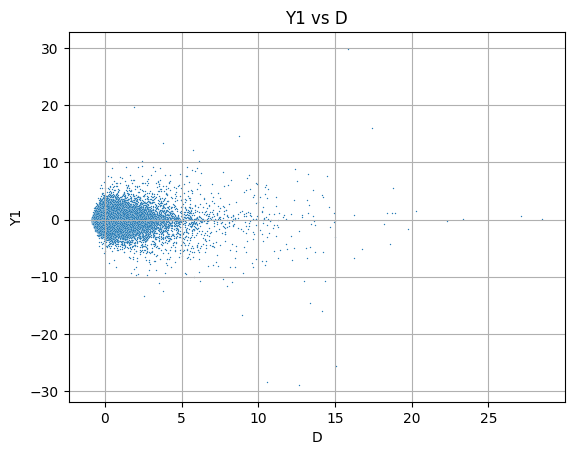

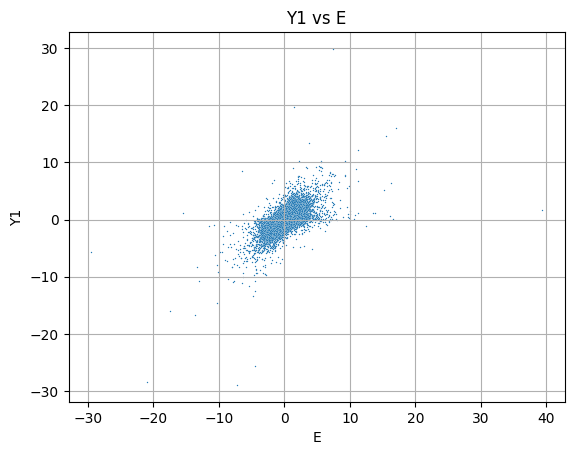

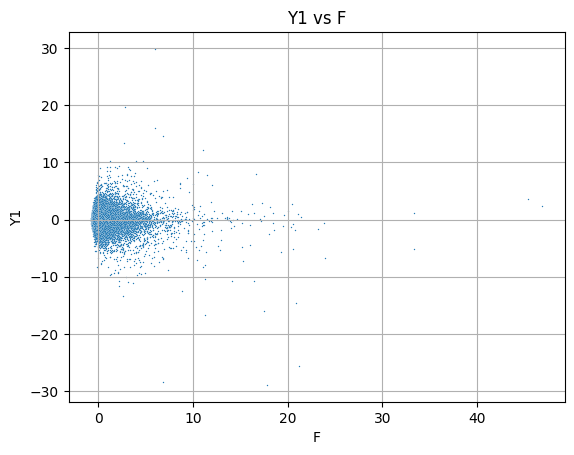

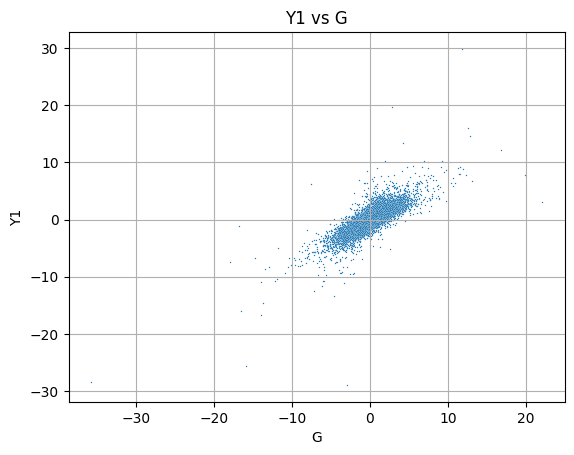

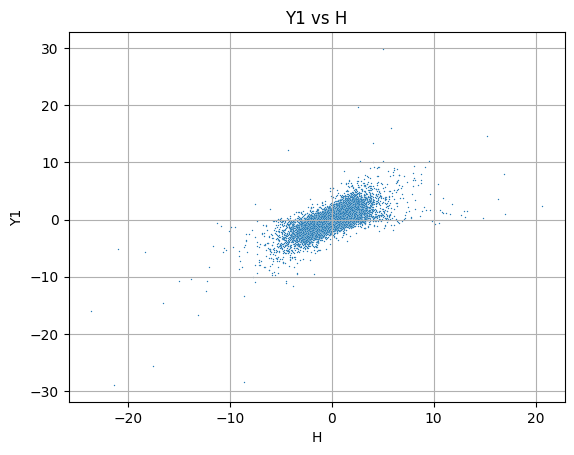

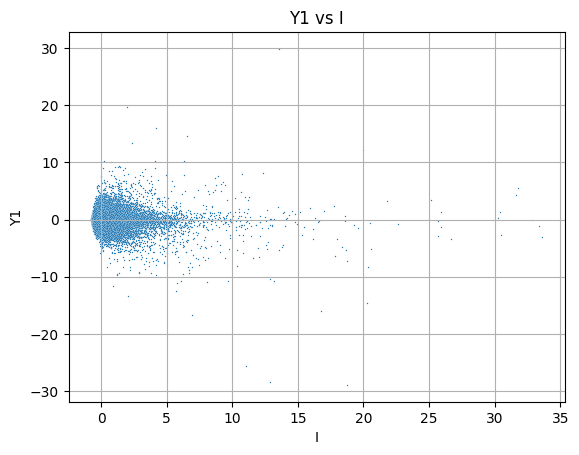

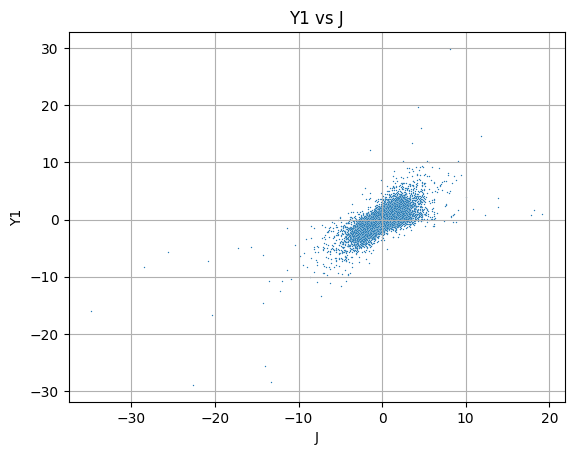

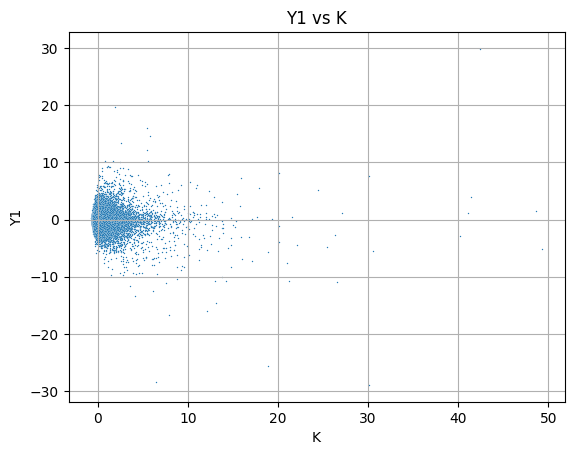

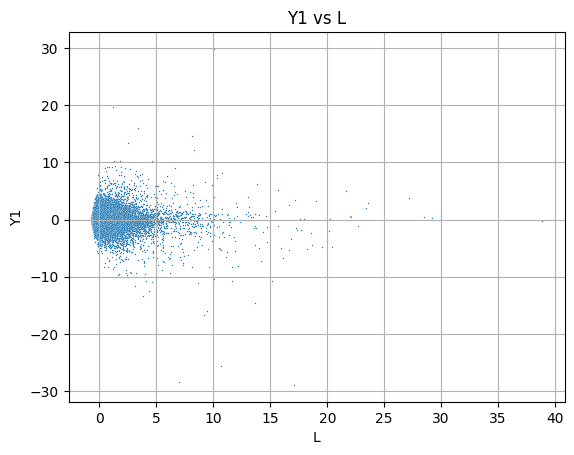

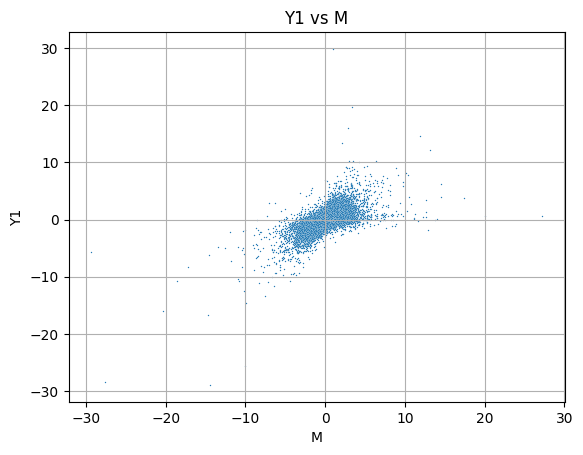

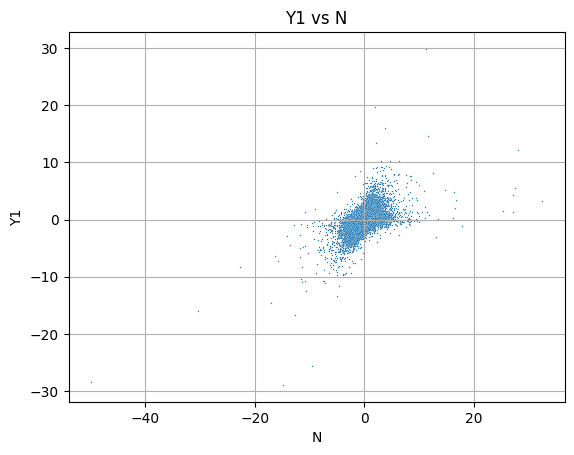

In [14]:
# visualise side by side with Y1
for predictor in predictors:
    sns.scatterplot(df_trainRaw, x=predictor, y="Y1", s=1)
    plt.grid(True)
    plt.title(f"Y1 vs {predictor}")
    plt.show()

In [15]:
# linear rankings correlation
df_linearRankings = (df_trainRaw[predictors+responders].corr()**2)[responders].drop(responders, axis=0)
df_linearRankings["Y1_rank"] = df_linearRankings["Y1"].rank(method="dense", ascending=False).astype(int)
df_linearRankings["Y2_rank"] = df_linearRankings["Y2"].rank(method="dense", ascending=False).astype(int)
df_linearRankings.sort_values("Y1", ascending=False, inplace=True)
df_linearRankings


,Y1,Y2,Y1_rank,Y2_rank
G,0.663520,0.003622,1,13
J,0.524062,0.009601,2,8
H,0.500641,0.007565,3,10
C,0.495366,0.005330,4,12
M,0.470933,0.009087,5,9
E,0.468262,0.001988,6,14
N,0.354938,0.006427,7,11
B,0.009024,0.338560,8,3
I,0.008141,0.258416,9,4
K,0.006431,0.359020,10,2


In [16]:
# next rank predictor effectiveness on Y1
X_trainRaw = df_trainRaw[predictors]
y_trainRaw = df_trainRaw[responders]
XGrank = XGBRegressor()
XGrank.fit(X_trainRaw, y_trainRaw)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

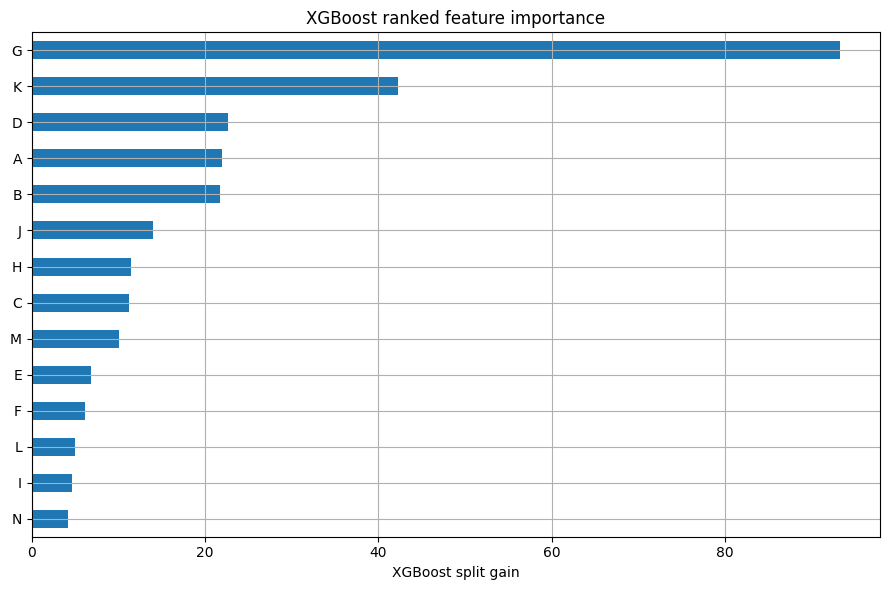

In [17]:
# extract
booster = XGrank.get_booster()
raw = booster.get_score(importance_type="gain")  
imp = pd.Series(raw)

# map
if not set(imp.index).issubset(set(X_trainRaw.columns)):
    name_map = {f"f{i}": col for i, col in enumerate(X_trainRaw.columns)}
    imp = imp.rename(index=name_map)

# visualise
imp = imp.sort_values(ascending=True)  
plt.figure(figsize=(9, 6))
imp.tail(200).plot(kind="barh")
plt.xlabel("XGBoost split gain"); plt.title("XGBoost ranked feature importance")
plt.grid(True)
plt.tight_layout(); plt.show()

In [18]:
# add back to linear
df_linearRankings["XGB score"] = imp
df_linearRankings["Y1_XGB_rank"] = df_linearRankings["XGB score"].rank(method="dense", ascending=False).astype(int)
df_linearRankings

,Y1,Y2,Y1_rank,Y2_rank,XGB score,Y1_XGB_rank
G,0.663520,0.003622,1,13,93.205704,1
J,0.524062,0.009601,2,8,14.005832,6
H,0.500641,0.007565,3,10,11.439562,7
C,0.495366,0.005330,4,12,11.247334,8
M,0.470933,0.009087,5,9,10.065745,9
E,0.468262,0.001988,6,14,6.874068,10
N,0.354938,0.006427,7,11,4.178530,14
B,0.009024,0.338560,8,3,21.757099,5
I,0.008141,0.258416,9,4,4.678691,13
K,0.006431,0.359020,10,2,42.310822,2
